# MULTIPLE LINEAR REGRESSION 

# Bike Sharing Assignment

BoomBikes, a US bike-sharing company, is seeking to recover from revenue losses caused by the COVID-19 pandemic by better understanding the factors influencing bike demand. 
The company has collected data on daily bike rentals influenced by various factors, including meteorological conditions and user behavior. 
They aim to build a multiple linear regression model to identify significant variables affecting demand and determine how well these factors predict it. 
Insights from this model will help BoomBikes tailor their business strategy to meet post-pandemic demand, gain a competitive edge, and prepare for new market opportunities.

The company wants to know —

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

## Step 1: Reading, Understanding and Exploring Data
Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Exploring and Manipulating the attributes using the info from Data Dictionary

In [6]:
day['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

##### Changing season values according to (1:spring, 2:summer, 3:fall, 4:winter)

In [7]:
seasons = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
day['season'] = day['season'].replace(seasons)
day['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [8]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### According to data dictionary year (0: 2018, 1:2019)

In [9]:
day['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [10]:
year = {0: 2018, 1: 2019}
day['yr'] = day['yr'].replace(year)
day['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

##### Changing Month(1:Jan,2:Feb, etc...,12:Dec)

In [11]:
day['mnth'].value_counts()

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64

In [12]:
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day['mnth'] = day['mnth'].replace(months)
day['mnth'].value_counts()

mnth
Jan    62
Mar    62
Jul    62
May    62
Dec    62
Oct    62
Aug    62
Apr    60
Sep    60
Jun    60
Nov    60
Feb    56
Name: count, dtype: int64

##### Changing holiday(0: No, 1: Yes)

In [13]:
day['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [14]:
holidayy={0: 'No', 1: 'Yes'}
day['holiday'] = day['holiday'].replace(holidayy)
day['holiday'].value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

##### Changing Weekday (1 - Wed, 2 - Thurs, 3 - Fri, 4 - Sat, 5 - Sun, 6 - Mon, 0 - Tue)

In [15]:
day['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [16]:
weekdays = {1:'Wed', 2: 'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 0:'Tue'}
day['weekday'] = day['weekday'].replace(weekdays)
day['weekday'].value_counts()

weekday
Wed      105
Thurs    105
Fri      104
Sat      104
Sun      104
Mon      104
Tue      104
Name: count, dtype: int64

##### Changing workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [17]:
day['workingday'].value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [18]:
workingdays_or_not = {1:'workingday', 0:'not workingday'}
day['workingday'] = day['workingday'].replace(workingdays_or_not)
day['workingday'].value_counts()

workingday
workingday        504
not workingday    226
Name: count, dtype: int64

##### Changing weathersit

In [19]:
day['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [20]:
weather = {1:'Clear/Partly Cloudy', 2:'Mist+Clouds', 3:'Light Precipitate'}
day['weathersit'] = day['weathersit'].replace(weather)
day['weathersit'].value_counts()

weathersit
Clear/Partly Cloudy    463
Mist+Clouds            246
Light Precipitate       21
Name: count, dtype: int64

### Data Visualisation

##### Finding out which attributes are categorical and which are numeric

In [21]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 91.4+ KB


##### Changing the data type of dteday to datetime

In [22]:
day['dteday'] = day['dteday'].astype('datetime64[ns]')

In [23]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
day_ncols = day.columns.difference(['dteday', 'instant','yr'])

<function matplotlib.pyplot.show(close=None, block=None)>

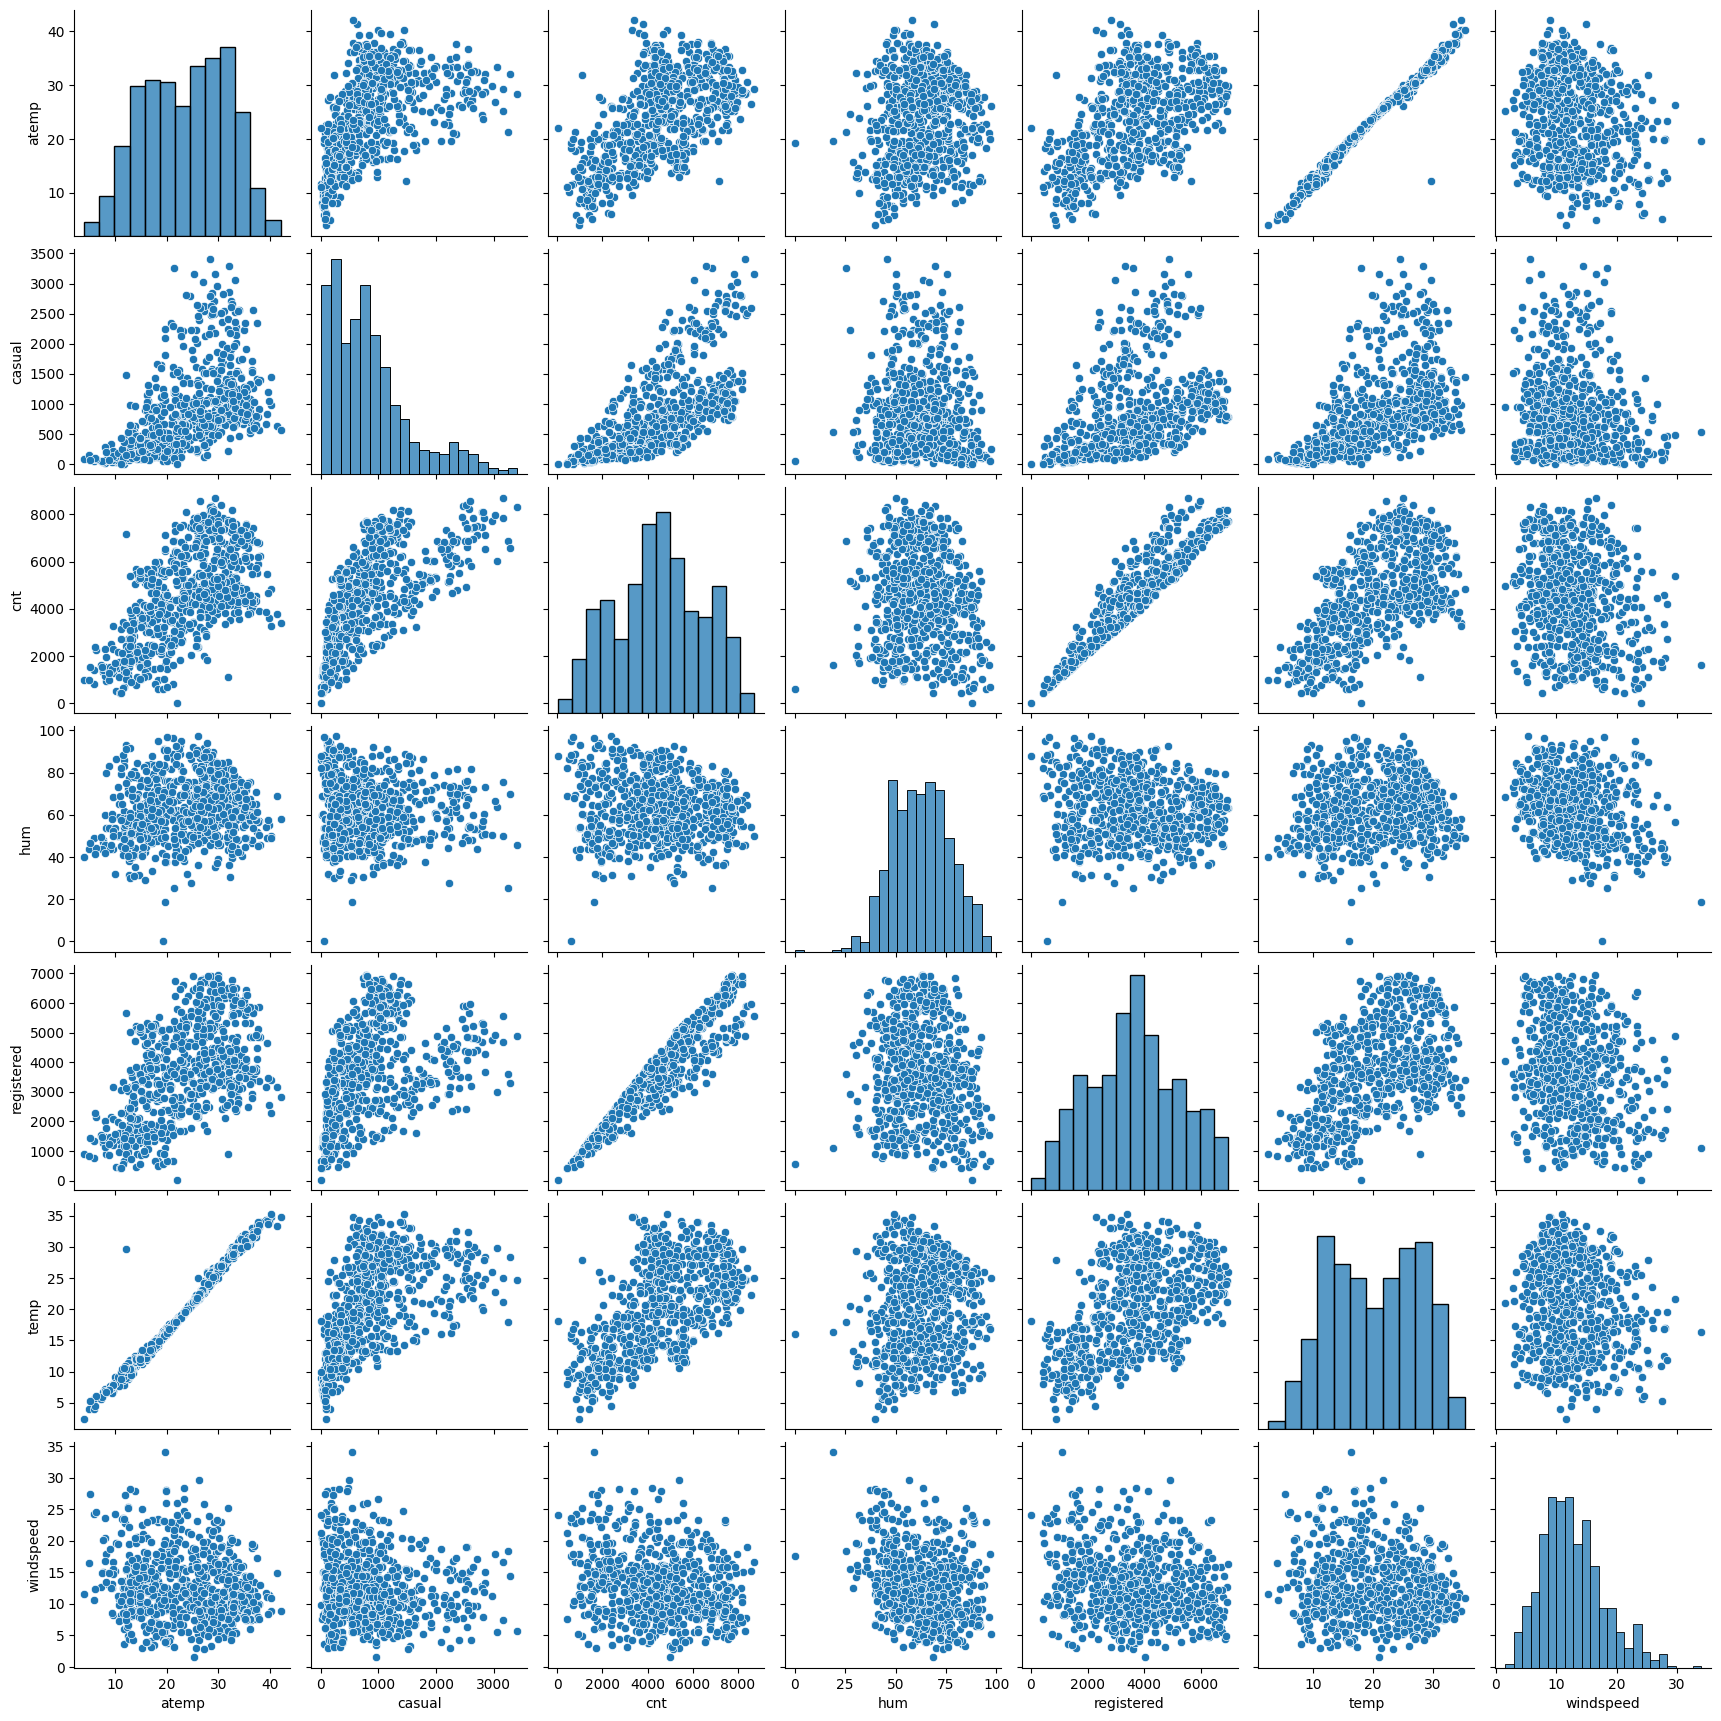

In [25]:
# Visualising the numeric data
sns.pairplot(day[day_ncols])
plt.show

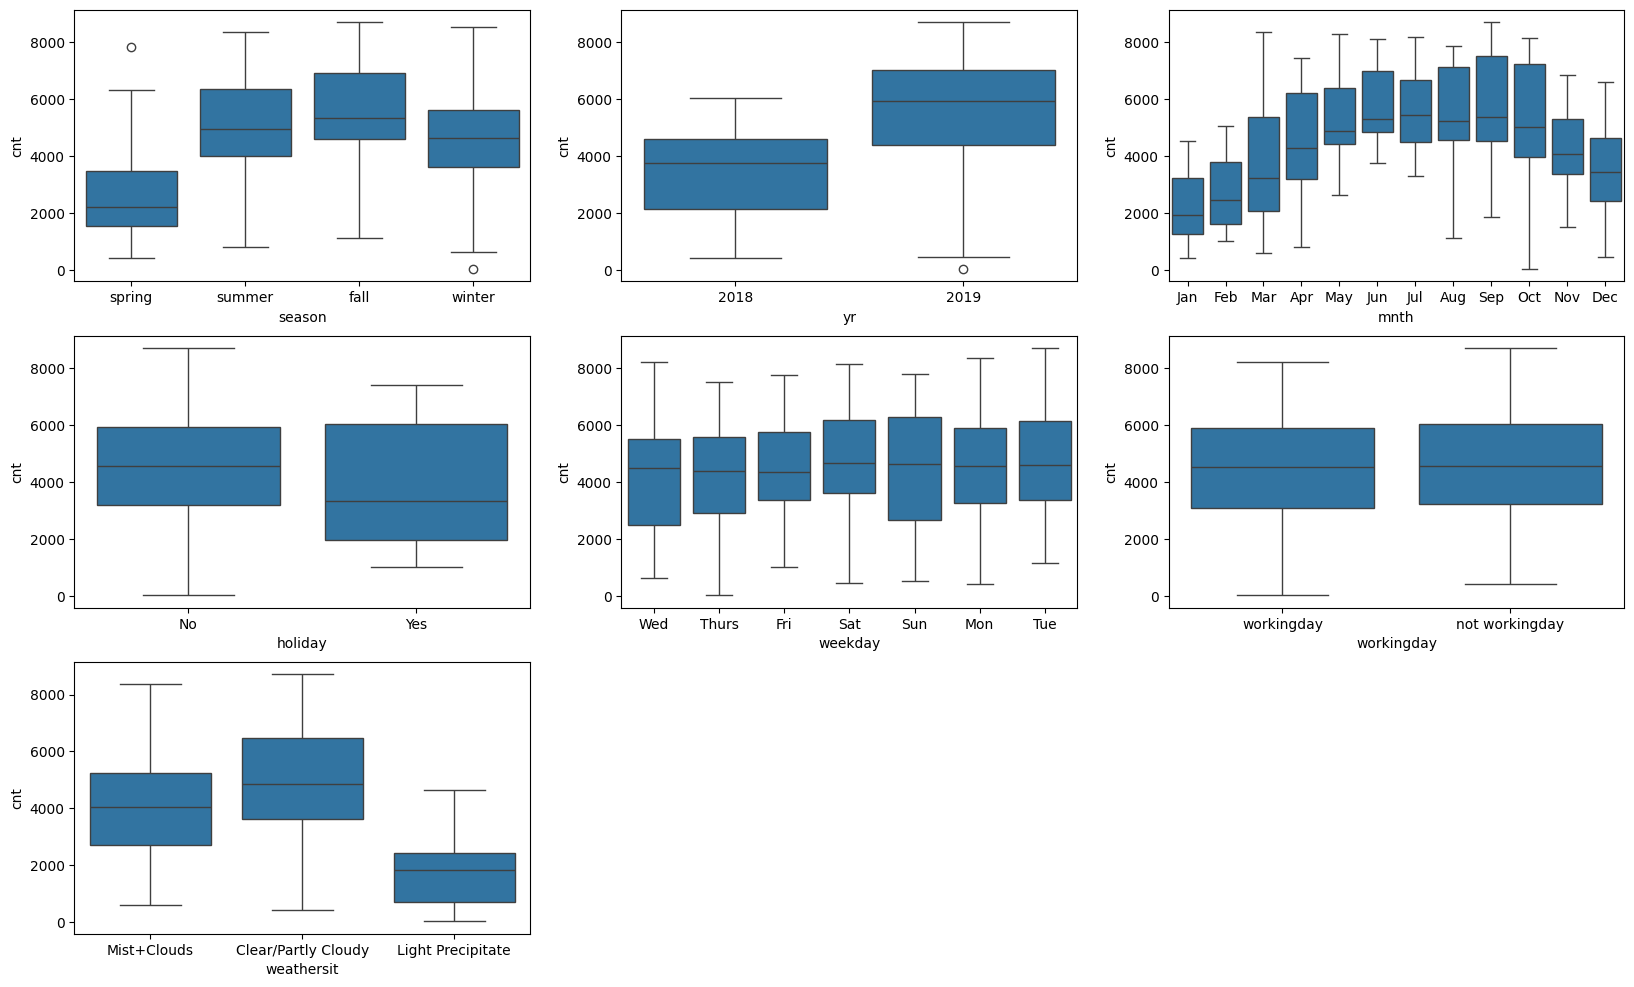

In [26]:
# Visualising categorical data
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=day)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data=day)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data=day)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt', data=day)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data=day)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data=day)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data=day)
plt.show()

## Step 2: Data Preparation

##### This includes:
1. Encoding:
   - Converting binary vars to 1s/0s
   - Other categorical vars to dummy vars
2. Splitting into train and test sets 
3. Rescaling of variables

In [27]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [28]:
#dropping instant, dteday as they are not of much use
#dropping casual and registered as cnt is their total
day = day.drop(['dteday','instant','casual','registered'],axis=1)

In [29]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Wed,workingday,Mist+Clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Thurs,workingday,Mist+Clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Fri,workingday,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Sat,workingday,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Sun,workingday,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


#### 1. Encoding - Dummy variables
The categorical variables have different levels. We need to convert these levels into integers.

In [30]:
#Group all categorical variables
day_ccols = day[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']]

In [31]:
day_dummies = pd.get_dummies(day_ccols, drop_first=True)
day_dummies = day_dummies.astype(int)
day_dummies.head()

,yr,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Precipitate,weathersit_Mist+Clouds
0,2018,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
1,2018,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,2018,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2018,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [32]:
#Correcting the yr column

In [33]:
day_dummies['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [34]:
years = {2018: 0, 2019: 1}
day_dummies['yr_2019'] = day_dummies['yr'].replace(years)
day_dummies['yr_2019'].value_counts()

yr_2019
0    365
1    365
Name: count, dtype: int64

In [35]:
day_dummies.head()

,yr,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Precipitate,weathersit_Mist+Clouds,yr_2019
0,2018,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
1,2018,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,2018,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2018,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2018,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [36]:
day_dummies.drop(['yr'],axis=1)

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Precipitate,weathersit_Mist+Clouds,yr_2019
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
726,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [37]:
#Dropping the categorical variables from day
day = day.drop(day_ccols.columns, axis=1)

In [38]:
#Concatenating the DataFrame day with day_dummies
day_final = pd.concat([day,day_dummies], axis=1)
day_final.head()

,temp,atemp,hum,windspeed,cnt,yr,season_spring,season_summer,season_winter,mnth_Aug,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Precipitate,weathersit_Mist+Clouds,yr_2019
0,14.110847,18.18125,80.5833,10.749882,985,2018,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,2018,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,2018,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,2018,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,2018,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [39]:
#dropping yr column
day_final = day_final.drop(['yr','atemp'], axis=1)

In [40]:
day_final.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Precipitate,weathersit_Mist+Clouds,yr_2019
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [41]:
day_final.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'workingday_workingday',
       'weathersit_Light Precipitate', 'weathersit_Mist+Clouds', 'yr_2019'],
      dtype='object')

#### 3. Rescaling the variables
It is extremely important to rescale the variables so that they have a comparable scale. 
If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 

There are two common ways of rescaling:
- Min-Max scaling(normalisation): Between 0 and 1
- Standardisation (mean-0, Standard deviation:sigma-1)

This time, we will use MinMax scaling.

In [42]:
#import MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
scaler = MinMaxScaler()

#creating a list of numeric vars
var = ['temp', 'hum', 'windspeed', 'cnt']

#2.Fit on data
day_final[var] = scaler.fit_transform(day_final[var])
day_final.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Precipitate,weathersit_Mist+Clouds,yr_2019
0,0.355170,0.828620,0.284606,0.110792,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0.379232,0.715771,0.466215,0.089623,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0.171000,0.449638,0.465740,0.152669,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.175530,0.607131,0.284297,0.177174,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.209120,0.449313,0.339143,0.181546,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## Step 3:  Splitting into train set and test set

In [43]:
X = day_final.drop(['cnt'], axis=1)
y = day_final['cnt']

In [44]:
X.shape

(730, 28)

In [45]:
y.shape

(730,)

In [46]:
# dividing data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Precipitate,weathersit_Mist+Clouds,yr_2019
239,0.807351,0.577650,0.581909,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
97,0.344785,0.859897,0.421794,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
503,0.673950,0.469152,0.126957,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
642,0.692641,0.645244,0.173084,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
498,0.640722,0.811911,0.392314,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1


In [48]:
y_train.head()

239    0.496088
97     0.166705
503    0.951680
642    0.935803
498    0.324551
Name: cnt, dtype: float64

In [49]:
X_train.describe().columns # print only the numeric columns in the dataset

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'workingday_workingday',
       'weathersit_Light Precipitate', 'weathersit_Mist+Clouds', 'yr_2019'],
      dtype='object')

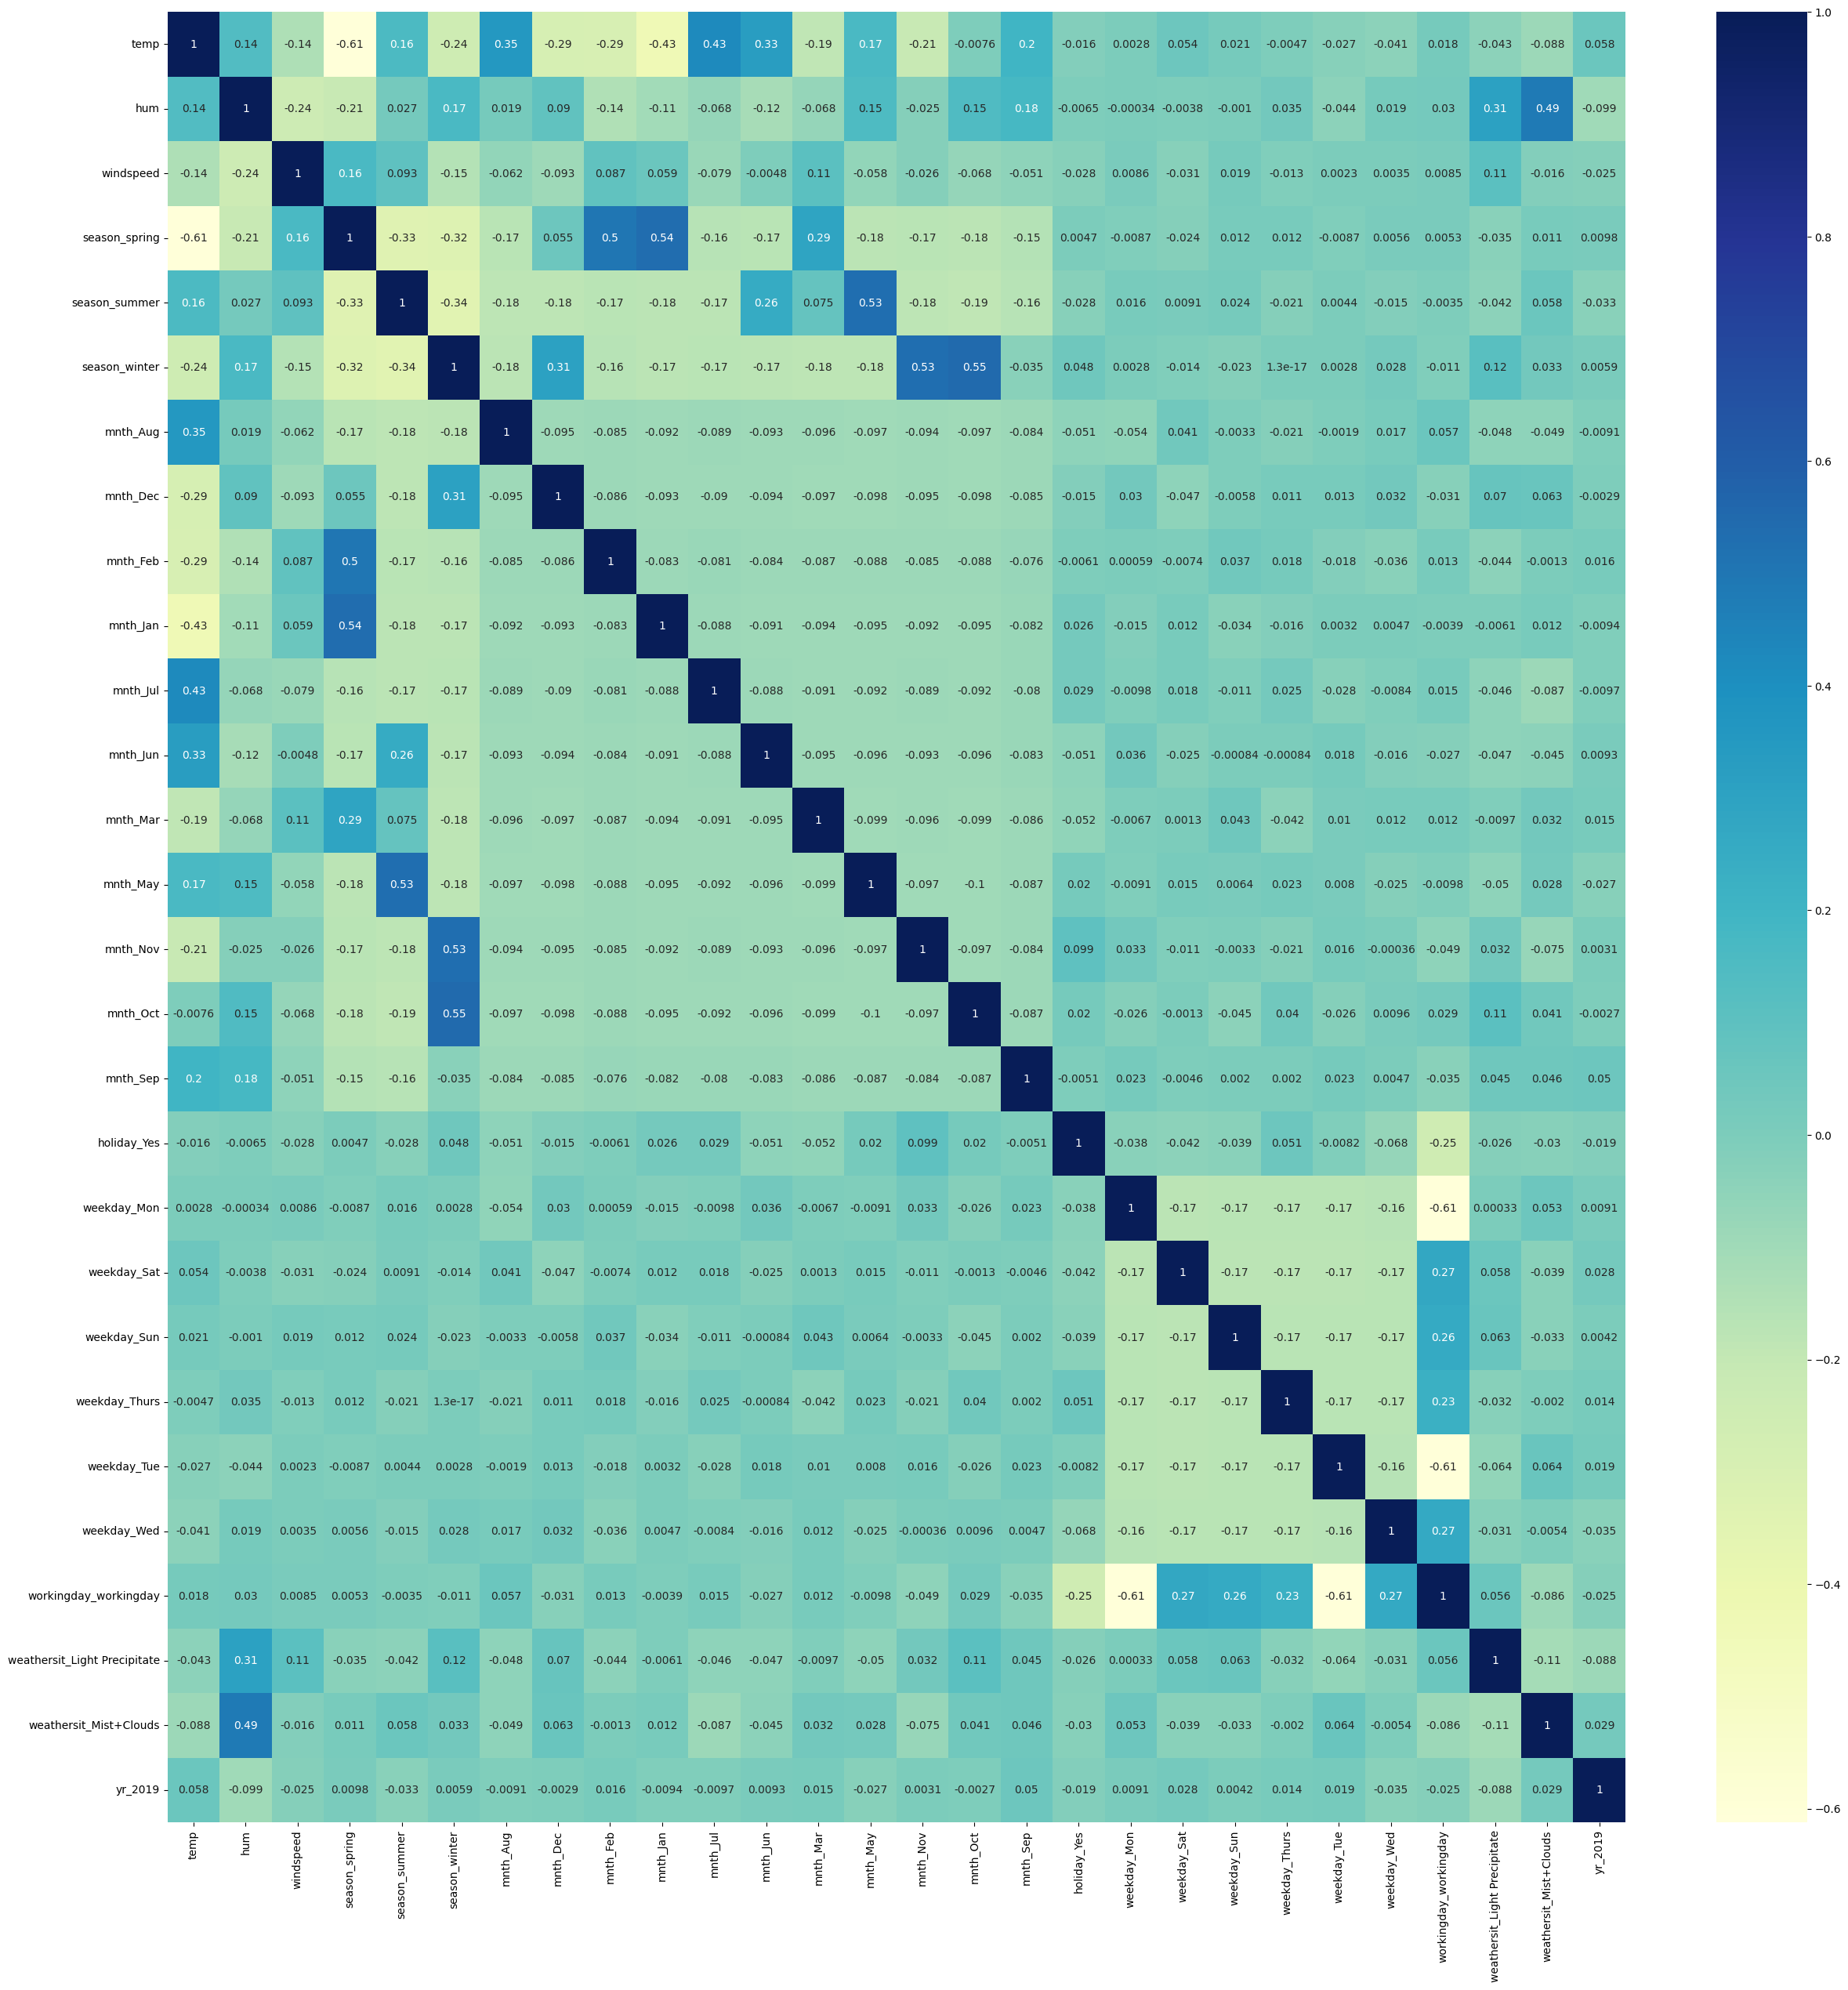

In [50]:
# Plotting a heatmap to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 4: Building our model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)  # Correct syntax
rfe = rfe.fit(X_train, y_train)


In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.False_, np.int64(9)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_Aug', np.False_, np.int64(3)),
 ('mnth_Dec', np.True_, np.int64(1)),
 ('mnth_Feb', np.True_, np.int64(1)),
 ('mnth_Jan', np.True_, np.int64(1)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_Jun', np.False_, np.int64(4)),
 ('mnth_Mar', np.False_, np.int64(7)),
 ('mnth_May', np.True_, np.int64(1)),
 ('mnth_Nov', np.True_, np.int64(1)),
 ('mnth_Oct', np.False_, np.int64(8)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('holiday_Yes', np.True_, np.int64(1)),
 ('weekday_Mon', np.True_, np.int64(1)),
 ('weekday_Sat', np.False_, np.int64(5)),
 ('weekday_Sun', np.False_, np.int64(6)),
 ('weekday_Thurs', np.False_, np.int64(2)),
 ('weekday_Tue', np.True_, np.int64(1)),
 ('weekday_Wed', np.True_, np.int64(1)),
 ('workingday_workingday', np.True_, np.int64(1)),

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed',
       'workingday_workingday', 'weathersit_Light Precipitate',
       'weathersit_Mist+Clouds', 'yr_2019'],
      dtype='object')

In [55]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [58]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [59]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.84e-205
Time:                        21:24:24   Log-Likelihood:                 589.41
No. Observations:                 584   AIC:                            -1137.
Df Residuals:                     563   BIC:                            -1045.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

p-value of weekday_Mon, weekday_Tues, weekday_Thurs, workingday_workingday and mnth_Feb seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [60]:
# p-value of weekday_Mon, weekday_Tues, weekday_Wed, workingday_Not Holiday  seems to be higher than the 
# significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.
X_train_new = X_train_rfe.drop(["weekday_Mon", "weekday_Tue", "weekday_Wed", "workingday_workingday"], axis = 1)

Rebuilding the model

In [61]:
#Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [62]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [63]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          5.93e-207
Time:                        21:24:24   Log-Likelihood:                 582.34
No. Observations:                 584   AIC:                            -1131.
Df Residuals:                     567   BIC:                            -1056.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [64]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'holiday_Yes', 'weathersit_Light Precipitate',
       'weathersit_Mist+Clouds', 'yr_2019'],
      dtype='object')

In [65]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [66]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,26.94
0,temp,17.67
2,windspeed,4.97
3,season_spring,4.55
4,season_winter,3.15
14,weathersit_Mist+Clouds,2.32
7,mnth_Jan,2.28
15,yr_2019,2.04
6,mnth_Feb,2.02
10,mnth_Nov,1.85


In [67]:
corr_matrix = X[['hum', 'temp']].corr()
print(corr_matrix)

           hum      temp
hum   1.000000  0.141291
temp  0.141291  1.000000


In [68]:
#Lets drop 'hum'
X = X.drop('hum', axis =1)

In [69]:
#create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#paramss
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     175.2
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.27e-201
Time:                        21:24:24   Log-Likelihood:                 566.93
No. Observations:                 584   AIC:                            -1102.
Df Residuals:                     568   BIC:                            -1032.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3053      0.025     11.993      0.000       0.255       0.355
temp                             0.3743      0.032     11.848      0.000       0.312       0.436
windspeed                       -0.1350      0.026     -5.260      0.000      -0.185      -0.085
season_spring                   -0.0948      0.018     -5.356      0.000      -0.130      -0.060
season_winter                    0.0669      0.014      4.837      0.000       0.040       0.094
mnth_Dec                        -0.0688      0.017     -4.005      0.000      -0.103      -0.035
mnth_Feb                        -0.0476      0.021     -2.310      0.021      -0.088      -0.007
mnth_Jan                        -0.0693      0.021     -3.348      0.001      -0.110      -0.029
mnth_Jul                        -0.0532      0.017     -3.174      0.002      -0.086      -0.020
mnth_May                         0.0205      0.015      1.399      0.162      -0.008       0.049
mnth_Nov                        -0.0719      0.018     -3.951      0.000      -0.108      -0.036
mnth_Sep                         0.0486      0.016      3.040      0.002       0.017       0.080
holiday_Yes                     -0.0557      0.024     -2.344      0.019      -0.102      -0.009
weathersit_Light Precipitate    -0.2691      0.026    -10.375      0.000      -0.320      -0.218
weathersit_Mist+Clouds          -0.0785      0.008     -9.395      0.000      -0.095      -0.062
yr_2019                          0.2307      0.008     29.595      0.000       0.215       0.246
==============================================================================
Omnibus:                       92.419   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.697
Skew:                          -0.784   Prob(JB):                     8.13e-56
Kurtosis:                       5.822   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.67
1,windspeed,4.92
2,season_spring,3.99
3,season_winter,2.64
6,mnth_Jan,2.17
14,yr_2019,2.03
5,mnth_Feb,2.00
9,mnth_Nov,1.80
4,mnth_Dec,1.58
13,weathersit_Mist+Clouds,1.53


## Step 5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

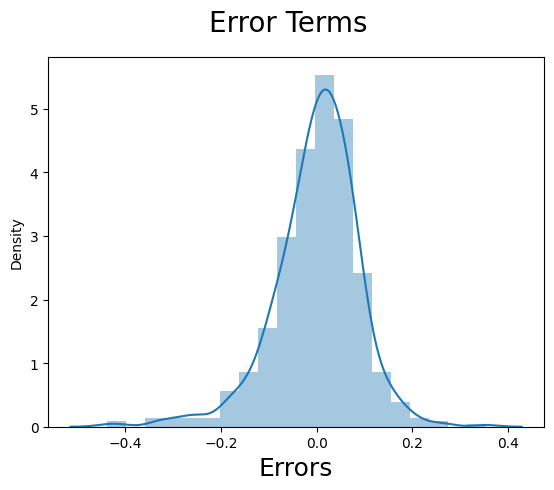

In [72]:
# The histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

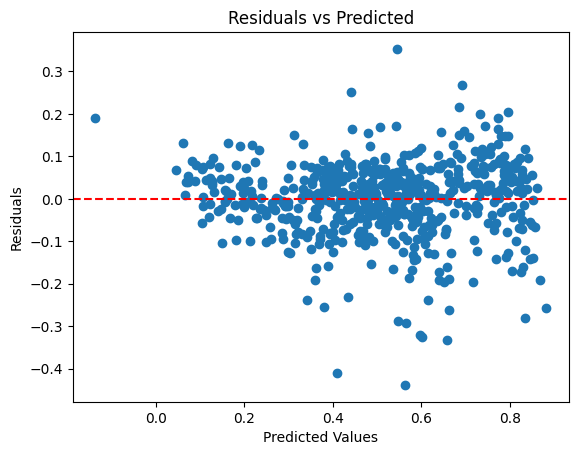

In [73]:
#To check Homoscedasticity:
plt.scatter(y_train_cnt, (y_train - y_train_cnt))
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

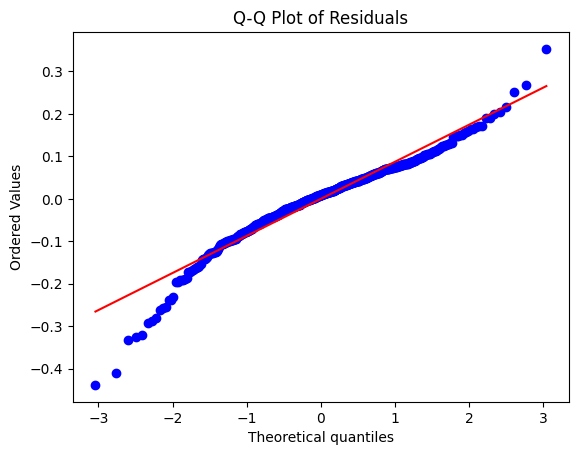

In [74]:
#Q-Q Plot for Residuals:
import scipy.stats as stats
stats.probplot((y_train - y_train_cnt), dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

## Step 6: Model Evaluation

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("R² (Training):", r2_score(y_train, y_pred_train))
print("R² (Testing):", r2_score(y_test, y_pred_test))
print("RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))

R² (Training): 0.8373120128681547
R² (Testing): 0.8704045149316654
RMSE: 0.08714501838876086


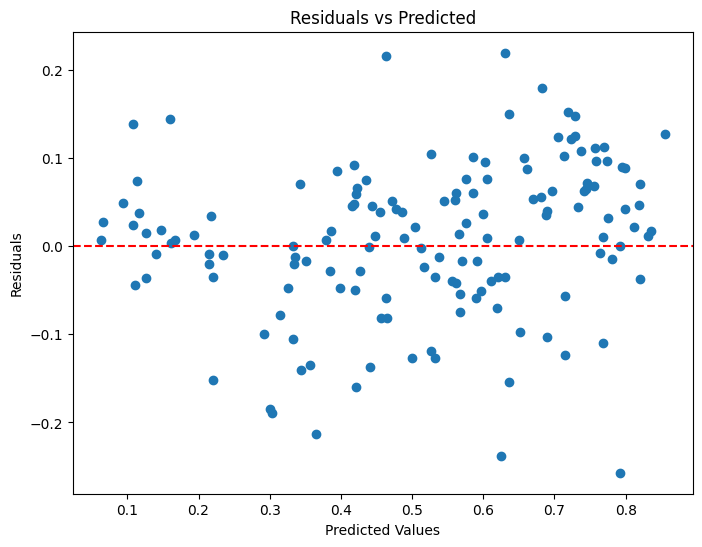

In [76]:
#Checking the residuals on the test data
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Text(0, 0.5, 'y_test_pred')

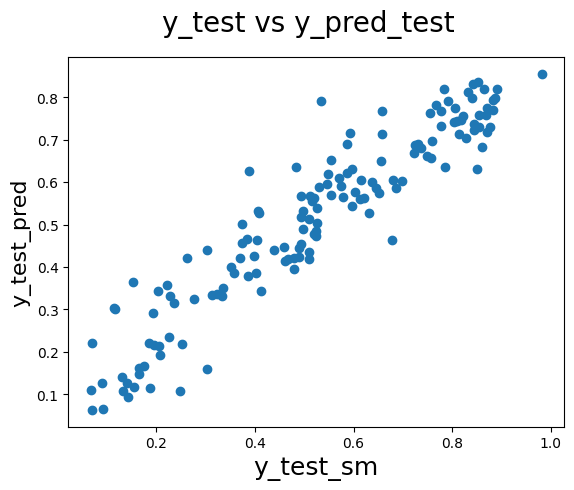

In [77]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_sm', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

### Assignment-based Subjective Questions

Q1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

Categorical variables like season, holiday, working day, and weather situation significantly influence the total bike demand (`cnt`):  
- Season: Demand fluctuates with seasons, peaking in summer and fall due to better weather conditions.  
- Holiday: Bike usage tends to drop on holidays compared to regular working days.  
- Working Day: Bike demand is higher on working days, likely driven by commuting needs.  
- Weather Situation: Unfavorable weather, such as heavy rain or snow, reduces bike demand.  

Q2. Why is it important to use drop_first=True during dummy variable creation?

Using `drop_first=True` during dummy variable creation helps avoid the dummy variable trap, where multicollinearity arises due to redundant information. By dropping one category, the model can infer its presence from the other categories, ensuring a more stable and interpretable regression model.

Q3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?

The pair plot indicates that the variable `registered` has the strongest positive correlation with the target variable (`cnt`), as the majority of bike demand is driven by registered users.

Q4. How did you validate the assumptions of Linear Regression after building the model on the training set?

The assumptions of linear regression were validated as follows:  
- Linearity: Assessed through scatterplots of residuals versus predicted values to confirm the absence of patterns.  
- Homoscedasticity: Ensured by checking for consistent variance of residuals across predicted values.  
- Normality of Residuals: Verified using a Q-Q plot or a histogram to confirm a normal distribution.  
- Multicollinearity: Evaluated by calculating Variance Inflation Factors (VIF) to ensure predictors are not strongly correlated.

Q5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?

The top three features influencing demand are:  
- Registered Users (`registered`): Exhibits a strong positive correlation with bike demand.  
- Temperature (`temp`): Demand increases with higher temperatures.  
- Season (`season`): Summer and fall experience significantly higher demand compared to winter and spring.  